In [427]:
import pandas as pd
import numpy as np
import random

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import keras
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.optimizers import Adam, rmsprop
from keras import regularizers

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from get_labeled_dfs import *
from process_text import *

In [428]:
# getting data
corpus_df, val_corpus_df, emotion_df, val_emotion_df, valence_df, val_valence_df = get_labeled_dfs()


In [429]:
# using custom class method to process data
processor = Process_Text_Data()
processor.transform(corpus_df)


In [430]:
corpus_df.head()


,text
0,test predict breast cancer relapse approve
1,two hussein ally hang iraqi official say
2,sight sound ces
3,schuey see ferrari unveil new car
4,closing cancellation top advice flu outbreak


In [431]:
emotion_df.head()

,anger,disgust,fear,joy,sadness,surprise,max,label
0,0,0,15,38,9,11,joy,3
1,24,26,16,13,38,5,sadness,4
2,0,0,0,17,0,4,joy,3
3,0,0,0,46,0,31,joy,3
4,1,0,23,8,11,8,fear,2


## RNN: Emotion Labels

In [432]:
total_vocabulary = set(word for headline in data for word in headline)
glove_embeddings = {}
with open('/Users/flatironschool/Desktop/glove/glove.6B.300d.txt', 'rb') as f:
    for line in f:
        split = line.split()
        word = split[0].decode('utf-8')
        if word in total_vocabulary:
            glove_embeddings[word] = np.array(parts[1:], dtype=np.float32)

In [433]:
num_words = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((num_words, 300))

for ind, word in enumerate(tokenizer.word_index.keys()):
    if word in glove_embeddings.keys():
        embedding_matrix[ind + 1, :] = glove_embeddings[word]
        

In [465]:
X = corpus_df['text']
y = emotion_df['label']



tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(X))
sequences = tokenizer.texts_to_sequences(X)
padded_X = sequence.pad_sequences(sequences, maxlen=20)

# tokenizer.word_index
# tokenizer.index_word
# len(word_idx) + 1
# tokenizer.word_counts
sequences

[[24, 894, 160, 41, 895, 896],
 [42, 522, 229, 333, 25, 66, 2],
 [523, 897, 898],
 [899, 67, 900, 230, 4, 109],
 [901, 902, 56, 231, 35, 232],
 [524, 903, 334, 335],
 [233, 234, 336, 161, 337, 338],
 [339, 904, 162, 68, 110, 163],
 [525, 164, 526, 235, 905, 4, 340],
 [906, 236, 527, 907],
 [908, 90, 69, 43, 341, 111, 909, 528],
 [910, 44, 342, 343, 344],
 [529, 345, 911, 912],
 [913, 914, 915, 916],
 [530, 917, 112, 918],
 [919, 113, 17, 237],
 [531, 43, 91, 920, 921],
 [3, 922, 532, 923, 57, 346],
 [238, 70, 924, 339, 45],
 [92, 31, 114, 347, 115, 239],
 [925, 926, 533, 927],
 [348, 349, 32, 46, 928, 929],
 [534, 165, 33, 116, 93],
 [930, 58, 350, 535, 931, 932],
 [933, 934, 36, 935, 37, 71],
 [1, 351, 114, 117, 536],
 [240, 67, 72, 352, 21],
 [73, 166, 353, 537, 354, 93],
 [167, 936, 355, 110, 94, 168, 937],
 [356, 938, 538, 169, 939],
 [539, 241, 22, 113, 357, 170],
 [358, 74, 940, 22, 118, 941],
 [942, 540, 943],
 [944, 119, 945, 541, 359, 242, 34, 360],
 [542, 946, 37, 95, 947, 54

In [444]:
# embedding_matrix[num_words-1]

In [446]:
random.seed(2)
train_list = np.random.choice(range(0,1000), size=750, replace=False)
test_list = [i for i in range(0,1000) if i not in train_list]

X_train = padded_X[train_list]
X_test = padded_X[test_list]


# labels one hot encoded
y_train = pd.get_dummies(y.iloc[train_list]).values
y_test = pd.get_dummies(y.iloc[test_list]).values

# y_train_binary = keras.utils.to_categorical(y_train, 6)
# y_test_binary = keras.utils.to_categorical(y_test, 6)




In [464]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 534, 165,  33, 116,  93], dtype=int32)

In [470]:
model = Sequential()

model.add(Embedding(num_words, 300, weights=[embedding_matrix], input_length=20, trainable=False))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.5))
# model.add(LSTM(50, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(loss='mean_squared_error',
              optimizer=rmsprop(lr=.001, decay=.00001),
              metrics=['accuracy'])

print(model.summary())

# history = model.fit(X_train, 
#                     y_train,
#                     epochs=100,
#                     batch_size=50,
#                     validation_data=(X_test, y_test))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_105 (Embedding)    (None, 20, 300)           728100    
_________________________________________________________________
lstm_139 (LSTM)              (None, 50)                70200     
_________________________________________________________________
dropout_136 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_78 (Dense)             (None, 6)                 306       
Total params: 798,606
Trainable params: 70,506
Non-trainable params: 728,100
_________________________________________________________________
None


In [460]:
model.evaluate(X_test, y_test)

250/250 [==============================] - 0s 287us/step


[0.1270070263147354, 0.35600000047683716]

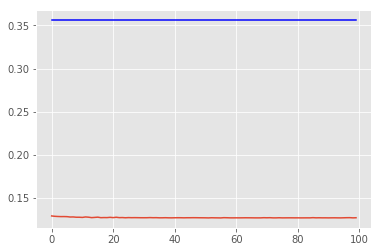

In [461]:
plt.plot(model.history.history['val_acc'], color='blue')
plt.plot(model.history.history['val_loss'])

In [462]:
preds = model.predict_on_batch(X_test)

pd.DataFrame({"Prediction Anger":preds[:,0], "Prediction Disgust":preds[:,1], "Prediction Fear":preds[:,2], "Prediction Joy":preds[:,3], "Prediction Sadness":preds[:,4], "Prediction Surprise":preds[:,5], "Anger":y_test[:,0], "Disgust":y_test[:,1], "Fear": y_test[:,2], "Joy": y_test[:,3], "Sadness": y_test[:,4], "Surprise": y_test[:,5]}) 

,Prediction Anger,Prediction Disgust,Prediction Fear,Prediction Joy,Prediction Sadness,Prediction Surprise,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,0.064767,0.018374,0.156375,0.374862,0.206930,0.178693,0,0,0,1,0,0
1,0.068876,0.018843,0.164555,0.353720,0.214020,0.179986,0,0,0,0,1,0
2,0.072081,0.018899,0.170539,0.336961,0.220108,0.181411,0,0,0,0,0,1
3,0.053424,0.017416,0.111347,0.428468,0.211401,0.177945,0,0,0,0,0,1
4,0.060725,0.018011,0.146972,0.397203,0.199727,0.177362,0,0,0,0,0,1
5,0.068876,0.018843,0.164555,0.353720,0.214020,0.179986,0,0,0,0,0,1
6,0.068876,0.018843,0.164555,0.353720,0.214020,0.179986,0,0,0,0,0,1
7,0.068876,0.018843,0.164555,0.353720,0.214020,0.179986,0,1,0,0,0,0
8,0.064767,0.018374,0.156375,0.374862,0.206930,0.178693,0,0,0,0,0,1
9,0.068876,0.018843,0.164555,0.353720,0.214020,0.179986,0,0,0,0,0,1


# RNN with Valence Labels

In [363]:
X = corpus_df['text']
y = valence_df['label']



tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(X))
sequences = tokenizer.texts_to_sequences(X)
padded_X = sequence.pad_sequences(sequences, maxlen=20)

# tokenizer.word_index
# tokenizer.index_word
# len(word_idx) + 1
# tokenizer.word_counts
padded_X.shape

(1000, 20)

Train on 750 samples, validate on 250 samples
Epoch 1/100
750/750 [==============================] - 8s 11ms/step - loss: 0.2208 - acc: 0.3933 - val_loss: 0.2198 - val_acc: 0.3760
Epoch 2/100
750/750 [==============================] - 0s 533us/step - loss: 0.2195 - acc: 0.4133 - val_loss: 0.2199 - val_acc: 0.3760
Epoch 3/100
750/750 [==============================] - 0s 547us/step - loss: 0.2203 - acc: 0.4093 - val_loss: 0.2202 - val_acc: 0.3760
Epoch 4/100
750/750 [==============================] - 0s 591us/step - loss: 0.2191 - acc: 0.4133 - val_loss: 0.2197 - val_acc: 0.3760
Epoch 5/100
750/750 [==============================] - 0s 600us/step - loss: 0.2196 - acc: 0.3947 - val_loss: 0.2199 - val_acc: 0.3760
Epoch 6/100
750/750 [==============================] - 0s 604us/step - loss: 0.2187 - acc: 0.4107 - val_loss: 0.2200 - val_acc: 0.3760
Epoch 7/100
750/750 [==============================] - 0s 580us/step - loss: 0.2184 - acc: 0.4107 - val_loss: 0.2201 - val_acc: 0.3760
Epoch 8/10

750/750 [==============================] - 1s 1ms/step - loss: 0.2184 - acc: 0.4120 - val_loss: 0.2211 - val_acc: 0.3680
Epoch 62/100
750/750 [==============================] - 1s 893us/step - loss: 0.2182 - acc: 0.4133 - val_loss: 0.2213 - val_acc: 0.3680
Epoch 63/100
750/750 [==============================] - ETA: 0s - loss: 0.2191 - acc: 0.412 - 1s 907us/step - loss: 0.2186 - acc: 0.4227 - val_loss: 0.2210 - val_acc: 0.3680
Epoch 64/100
750/750 [==============================] - 1s 959us/step - loss: 0.2179 - acc: 0.4280 - val_loss: 0.2211 - val_acc: 0.3680
Epoch 65/100
750/750 [==============================] - 1s 1ms/step - loss: 0.2178 - acc: 0.4200 - val_loss: 0.2210 - val_acc: 0.3680
Epoch 66/100
750/750 [==============================] - 1s 1ms/step - loss: 0.2177 - acc: 0.4133 - val_loss: 0.2213 - val_acc: 0.3680
Epoch 67/100
750/750 [==============================] - 1s 1ms/step - loss: 0.2191 - acc: 0.4160 - val_loss: 0.2216 - val_acc: 0.3640
Epoch 68/100
750/750 [=========

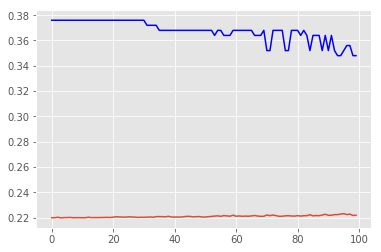

In [386]:
random.seed(2)
train_list = np.random.choice(range(0,1000), size=750, replace=False)
test_list = [i for i in range(0,1000) if i not in train_list]

X_train = padded_X[train_list]
X_test = padded_X[test_list]

# labels one hot encoded
y_train = (y.iloc[train_list]).values
y_test = (y.iloc[test_list]).values

y_train_binary = keras.utils.to_categorical(y_train, 3)
y_test_binary = keras.utils.to_categorical(y_test, 3)

X_train

model = Sequential()

model.add(Embedding(num_words, 300, weights=[embedding_matrix], input_length=20, trainable=False))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='mean_squared_error',
              optimizer=rmsprop(lr=.001, decay=.00001),
              metrics=['accuracy'])

history = model.fit(X_train, 
                    y_train_binary,
                    epochs=100,
                    batch_size=50,
                    validation_data=(X_test, y_test_binary))



model.evaluate(X_test, y_test_binary)

plt.plot(model.history.history['val_acc'], color='blue')
plt.plot(model.history.history['val_loss'])

In [389]:
preds = model.predict_on_batch(X_test)

In [398]:
pd.DataFrame({"Prediction Neg":preds[:,0], "Prediction Pos":preds[:,1], "Prediction Neu":preds[:,2], "Neg":y_test_binary[:,0], "Pos":y_test_binary[:,1], "Neu": y_test_binary[:,2]}) 

,Prediction Neg,Prediction Pos,Prediction Neu,Neg,Pos,Neu
0,0.431423,0.320455,0.248122,0.0,1.0,0.0
1,0.411251,0.327623,0.261125,1.0,0.0,0.0
2,0.383975,0.327544,0.288481,0.0,0.0,1.0
3,0.431423,0.320455,0.248122,0.0,0.0,1.0
4,0.431423,0.320455,0.248122,0.0,0.0,1.0
5,0.411251,0.327623,0.261125,0.0,0.0,1.0
6,0.411251,0.327623,0.261125,0.0,1.0,0.0
7,0.411251,0.327623,0.261125,1.0,0.0,0.0
8,0.411251,0.327623,0.261125,0.0,1.0,0.0
9,0.383975,0.327544,0.288481,1.0,0.0,0.0


In [397]:
y_test_binary[:,0]

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0.